# WIPO 2024

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
xls = pd.ExcelFile('wipo-pub-2000-2024-tech1.xlsx')
df = pd.read_excel(xls, 'Data')

In [3]:
df.head()

,ISO3,ECONOMY_NAME,NUM,NAME,DATAYR,VALUE_SCREEN,SCORE,RANK,SW_OVERALL,SW_INCGRP,OUTDATED,DMC
0,ALB,Albania,NaN,Global Innovation Index,NaN,NaN,24.537930,84.0,NaN,NaN,NaN,NaN
1,ALB,Albania,IN,Innovation inputs,NaN,NaN,35.043195,66.0,NaN,NaN,NaN,NaN
2,ALB,Albania,IN.1,Institutions,NaN,NaN,50.321760,60.0,NaN,NaN,NaN,0.0
3,ALB,Albania,IN.1.1,Institutional environment,NaN,NaN,55.174345,60.0,NaN,NaN,NaN,0.0
4,ALB,Albania,IN.1.1.1,Operational stability for businesses*,2023.0,2.025,64.666667,61.0,NaN,NaN,0.0,NaN


In [4]:
df = df[["ECONOMY_NAME", "NUM", "NAME", "SCORE", "RANK"]]

In [5]:
df.head()

,ECONOMY_NAME,NUM,NAME,SCORE,RANK
0,Albania,NaN,Global Innovation Index,24.537930,84.0
1,Albania,IN,Innovation inputs,35.043195,66.0
2,Albania,IN.1,Institutions,50.321760,60.0
3,Albania,IN.1.1,Institutional environment,55.174345,60.0
4,Albania,IN.1.1.1,Operational stability for businesses*,64.666667,61.0


In [6]:
countries = df["ECONOMY_NAME"].unique()
countries

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong, China', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lebanon',
     

In [7]:
names_to_drop = df[df["NUM"].astype(str).str.match(r"^[A-Z]+$|^[A-Z]+\.\d+$|^[A-Z]+\.\d+\.\d+$", na=False)]["NAME"].unique()
names_to_drop

array(['Innovation inputs', 'Institutions', 'Institutional environment',
       'Regulatory environment', 'Business environment',
       'Human capital and research', 'Education', 'Tertiary education',
       'Research and development (R&D)', 'Infrastructure',
       'Information and communication technologies (ICTs)',
       'General infrastructure', 'Ecological sustainability',
       'Market sophistication', 'Credit', 'Investment',
       'Trade, diversification and market scale',
       'Business sophistication', 'Knowledge workers',
       'Innovation linkages', 'Knowledge absorption',
       'Innovation outputs', 'Knowledge and technology outputs',
       'Knowledge creation', 'Knowledge impact', 'Knowledge diffusion',
       'Creative outputs', 'Intangible assets',
       'Creative goods and services', 'Online creativity'], dtype=object)

In [8]:
df = df[~df["NAME"].isin(names_to_drop)]

In [9]:
df.head()

,ECONOMY_NAME,NUM,NAME,SCORE,RANK
0,Albania,NaN,Global Innovation Index,24.537930,84.0
4,Albania,IN.1.1.1,Operational stability for businesses*,64.666667,61.0
5,Albania,IN.1.1.2,Government effectiveness*,45.682023,62.0
7,Albania,IN.1.2.1,Regulatory quality*,46.021116,64.0
8,Albania,IN.1.2.2,Rule of law*,39.082407,73.0


In [10]:
indicator = df["NAME"].unique()
indicator

array(['Global Innovation Index', 'Operational stability for businesses*',
       'Government effectiveness*', 'Regulatory quality*', 'Rule of law*',
       'Policy stability for doing business†',
       'Entrepreneurship policies and culture†',
       'Expenditure on education, % GDP',
       'Government funding/pupil, secondary, % GDP/cap',
       'School life expectancy, years',
       'PISA scales in reading, maths and science',
       'Pupil–teacher ratio, secondary', 'Tertiary enrolment, % gross',
       'Graduates in science and engineering, %',
       'Tertiary inbound mobility, %', 'Researchers, FTE/mn pop.',
       'Gross expenditure on R&D, % GDP',
       'Global corporate R&D investors, top 3, mn USD',
       'QS university ranking, top 3*', 'ICT access*', 'ICT use*',
       "Government's online service*", 'E-participation*',
       'Electricity output, GWh/mn pop.', 'Logistics performance*',
       'Gross capital formation, % GDP', 'GDP/unit of energy use',
       'Low-car

In [11]:
df.head()

,ECONOMY_NAME,NUM,NAME,SCORE,RANK
0,Albania,NaN,Global Innovation Index,24.537930,84.0
4,Albania,IN.1.1.1,Operational stability for businesses*,64.666667,61.0
5,Albania,IN.1.1.2,Government effectiveness*,45.682023,62.0
7,Albania,IN.1.2.1,Regulatory quality*,46.021116,64.0
8,Albania,IN.1.2.2,Rule of law*,39.082407,73.0


In [12]:
# Pivot the table to reshape it
df_clean = df.pivot(index="ECONOMY_NAME", columns="NAME", values="SCORE").reset_index()

In [13]:
df_clean = df_clean.set_index("ECONOMY_NAME")

In [14]:
df_clean.columns.name = None

In [15]:
df_clean.head()

,"Applied tariff rate, weighted avg., %",Citable documents H-index,"Creative goods exports, % total trade","Cultural and creative services exports, % total trade","Domestic credit to private sector, % GDP",Domestic industry diversification,"Domestic market scale, bn PPP$",E-participation*,"Electricity output, GWh/mn pop.",Entertainment and media market/th pop. 15–69,...,"Tertiary enrolment, % gross","Tertiary inbound mobility, %",Top-level domains (TLDs)/th pop. 15–69,Trademarks by origin/bn PPP$ GDP,"Unicorn valuation, % GDP",University–industry R&D collaboration†,Utility models by origin/bn PPP$ GDP,"VC received, value, % GDP","VC recipients, deals/bn PPP$ GDP","Venture capital (VC) investors, deals/bn PPP$ GDP"
ECONOMY_NAME,,,,,,,,,,,,,,,,,,,,,
Albania,92.210521,2.978723,0.015020,29.215047,10.006151,90.885519,0.999635,75.585798,9.349493,NaN,...,40.060361,3.800283,4.665280,19.538857,0.000000,59.694859,0.590961,0.367975,5.472364,NaN
Algeria,0.000000,10.159574,0.155159,0.263551,4.963085,14.199843,12.345052,20.935230,7.141591,1.651687,...,33.666366,1.178168,0.259106,14.238961,0.000000,54.663444,NaN,4.751620,0.276453,NaN
Angola,43.866376,0.851064,0.098477,NaN,0.000000,0.000000,5.046224,15.123299,1.716850,NaN,...,4.652238,NaN,0.065191,8.167782,0.000000,0.639246,1.106400,NaN,NaN,NaN
Argentina,54.224936,27.659574,0.529521,28.728915,2.947834,81.372727,24.432256,63.951704,11.641123,3.308273,...,70.485044,8.077687,4.149858,44.241083,7.863705,37.021758,4.290896,5.431742,4.196656,1.607256
Armenia,71.139047,9.946809,39.661030,11.251010,17.290359,72.020385,1.050496,56.973294,10.481087,NaN,...,38.055601,18.733270,4.152156,80.880401,0.000000,25.738732,47.278535,0.511027,16.983590,2.591861


In [16]:
df_clean["Global Innovation Index"]

ECONOMY_NAME
Albania       24.537930
Algeria       16.162259
Angola        10.216209
Argentina     26.424646
Armenia       29.018772
                ...    
Uruguay       29.130889
Uzbekistan    24.704469
Viet Nam      36.181335
Zambia        15.664772
Zimbabwe      15.574619
Name: Global Innovation Index, Length: 133, dtype: float64

In [17]:
missing_percentage = df_clean.isnull().mean() * 100

In [18]:
missing_percentage.sort_values(ascending=False)

Entertainment and media market/th pop. 15–69    53.383459
Loans from microfinance institutions, % GDP     53.383459
Intangible asset intensity, top 15, %           40.601504
Utility models by origin/bn PPP$ GDP            37.593985
Market capitalization, % GDP                    36.090226
                                                  ...    
Operational stability for businesses*            0.000000
Software spending, % GDP                         0.000000
Rule of law*                                     0.000000
Unicorn valuation, % GDP                         0.000000
Top-level domains (TLDs)/th pop. 15–69           0.000000
Length: 79, dtype: float64

In [19]:
# Fill missing values with 0 if missing value is less than 40% of the column
columns_to_fill = missing_percentage[missing_percentage < 40].index
columns_to_drop = missing_percentage[missing_percentage >= 40].index

num_fill = len(columns_to_fill)
num_drop = len(columns_to_drop)

print(f"Number of features to fill: {num_fill}")
print(f"Number of features to drop: {num_drop}")

Number of features to fill: 76
Number of features to drop: 3


In [20]:
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(0)
df_clean = df_clean.drop(columns=columns_to_drop)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, Albania to Zimbabwe
Data columns (total 76 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Applied tariff rate, weighted avg., %                  133 non-null    float64
 1   Citable documents H-index                              133 non-null    float64
 2   Creative goods exports, % total trade                  133 non-null    float64
 3   Cultural and creative services exports, % total trade  133 non-null    float64
 4   Domestic credit to private sector, % GDP               133 non-null    float64
 5   Domestic industry diversification                      133 non-null    float64
 6   Domestic market scale, bn PPP$                         133 non-null    float64
 7   E-participation*                                       133 non-null    float64
 8   Electricity output, GWh/mn pop.             

In [21]:
df_clean.head()

,"Applied tariff rate, weighted avg., %",Citable documents H-index,"Creative goods exports, % total trade","Cultural and creative services exports, % total trade","Domestic credit to private sector, % GDP",Domestic industry diversification,"Domestic market scale, bn PPP$",E-participation*,"Electricity output, GWh/mn pop.",Entrepreneurship policies and culture†,...,"Tertiary enrolment, % gross","Tertiary inbound mobility, %",Top-level domains (TLDs)/th pop. 15–69,Trademarks by origin/bn PPP$ GDP,"Unicorn valuation, % GDP",University–industry R&D collaboration†,Utility models by origin/bn PPP$ GDP,"VC received, value, % GDP","VC recipients, deals/bn PPP$ GDP","Venture capital (VC) investors, deals/bn PPP$ GDP"
ECONOMY_NAME,,,,,,,,,,,,,,,,,,,,,
Albania,92.210521,2.978723,0.015020,29.215047,10.006151,90.885519,0.999635,75.585798,9.349493,0.000000,...,40.060361,3.800283,4.665280,19.538857,0.000000,59.694859,0.590961,0.367975,5.472364,0.000000
Algeria,0.000000,10.159574,0.155159,0.263551,4.963085,14.199843,12.345052,20.935230,7.141591,0.000000,...,33.666366,1.178168,0.259106,14.238961,0.000000,54.663444,0.000000,4.751620,0.276453,0.000000
Angola,43.866376,0.851064,0.098477,0.000000,0.000000,0.000000,5.046224,15.123299,1.716850,14.196904,...,4.652238,0.000000,0.065191,8.167782,0.000000,0.639246,1.106400,0.000000,0.000000,0.000000
Argentina,54.224936,27.659574,0.529521,28.728915,2.947834,81.372727,24.432256,63.951704,11.641123,2.104992,...,70.485044,8.077687,4.149858,44.241083,7.863705,37.021758,4.290896,5.431742,4.196656,1.607256
Armenia,71.139047,9.946809,39.661030,11.251010,17.290359,72.020385,1.050496,56.973294,10.481087,48.328560,...,38.055601,18.733270,4.152156,80.880401,0.000000,25.738732,47.278535,0.511027,16.983590,2.591861


In [22]:
df_clean.to_csv("Innovation_Index.csv")

In [23]:
X = df_clean.drop(columns=["Global Innovation Index"])
y = df_clean["Global Innovation Index"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

### Training the Model

In [25]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Display results
model_performance_LR = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Value": [mae, mse, rmse, r2]
})

In [26]:
model_performance_LR

,Metric,Value
0,Mean Absolute Error (MAE),2.192305
1,Mean Squared Error (MSE),8.479483
2,Root Mean Squared Error (RMSE),2.911955
3,R-squared (R²),0.966034


### Feature Importance

In [27]:
# Extract feature names
feature_names = X.columns

# Get absolute values of coefficients
feature_importance = np.abs(model.coef_)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Indicators": feature_names, "Importance": feature_importance})

# Sort by importance (descending order)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display results
importance_df

,Indicators,Importance
17,"GERD performed by business, % GDP",0.167569
26,"Gross expenditure on R&D, % GDP",0.143029
18,GitHub commits/mn pop. 15–69,0.075365
35,ISO 9001 quality/bn PPP$ GDP,0.074261
19,"Global brand value, top 5,000, % GDP",0.064011
...,...,...
51,Patents by origin/bn PPP$ GDP,0.001432
9,Entrepreneurship policies and culture†,0.001373
2,"Creative goods exports, % total trade",0.001290
25,"Gross capital formation, % GDP",0.000562


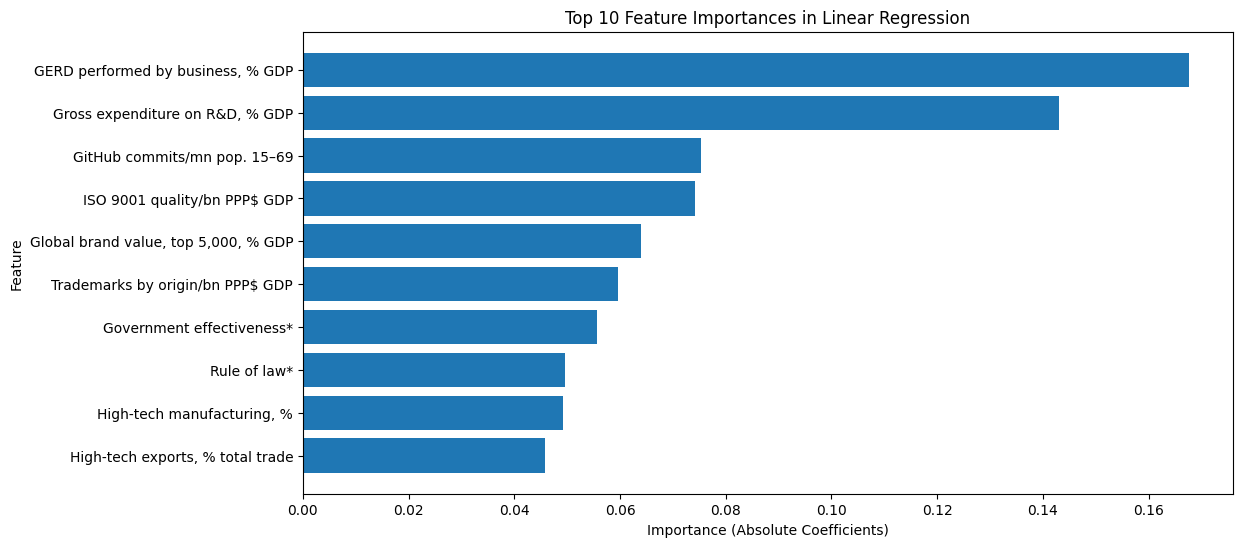

In [28]:
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df["Indicators"][:10], importance_df["Importance"][:10])
plt.xlabel("Importance (Absolute Coefficients)")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances in Linear Regression")
plt.gca().invert_yaxis()  # Invert to show highest importance at top
plt.show()

### Retrieve the Rank for Canada

In [29]:
# Ensure most_important_feature is in a list format
top_10_features = importance_df["Indicators"][:10].tolist()

# Filter df to get the row where NAME matches the most important features
feature_ranking_df = df[df["NAME"].isin(top_10_features)][["ECONOMY_NAME", "NAME", "SCORE", "RANK"]]

# Get Canada's rank
canada_rank = feature_ranking_df[feature_ranking_df["ECONOMY_NAME"] == "Canada"].copy()  # Explicit copy to avoid warning
canada_rank["NAME"] = pd.Categorical(canada_rank["NAME"], categories=top_10_features, ordered=True)
canada_rank = canada_rank.sort_values(by="NAME")

# Display results
pd.set_option('display.width', 400)
print(canada_rank)


     ECONOMY_NAME                                  NAME      SCORE  RANK
2785       Canada     GERD performed by business, % GDP  24.241412  21.0
2750       Canada       Gross expenditure on R&D, % GDP  28.315171  21.0
2832       Canada          GitHub commits/mn pop. 15–69  66.609483  11.0
2818       Canada          ISO 9001 quality/bn PPP$ GDP   7.057194  83.0
2823       Canada  Global brand value, top 5,000, % GDP  50.412682  13.0
2822       Canada      Trademarks by origin/bn PPP$ GDP  17.124073  77.0
2730       Canada             Government effectiveness*  84.910537  11.0
2733       Canada                          Rule of law*  88.753639  12.0
2812       Canada            High-tech manufacturing, %  38.010491  36.0
2816       Canada      High-tech exports, % total trade  20.542586  37.0


## LASSO Regression

### Train the Model

In [30]:
# Define the hyperparameter grid for alpha (L1 regularization strength)
param_grid = {"alpha": np.logspace(-4, 1, 10)}  # Search alpha values from 10^-4 to 10^1

# Use GridSearchCV to find the best alpha
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter
best_alpha = grid_search.best_params_["alpha"]
print(f"Best Alpha (L1 regularization strength): {best_alpha}")

# Train the Lasso model with the best alpha
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Make predictions
y_pred = best_lasso.predict(X_test)

# Evaluate the final model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Display results
model_performance_LASSO = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Value": [mae, mse, rmse, r2]
})

Best Alpha (L1 regularization strength): 0.7742636826811278


In [31]:
model_performance_LASSO

,Metric,Value
0,Mean Absolute Error (MAE),1.319576
1,Mean Squared Error (MSE),2.860244
2,Root Mean Squared Error (RMSE),1.691226
3,R-squared (R²),0.988543


### Feature Importance

In [32]:
# Extract feature importance from the best Lasso model
feature_names = X.columns
feature_importance = np.abs(best_lasso.coef_)  # Lasso can shrink coefficients to zero

# Create a DataFrame for visualization
lasso_importance_df = pd.DataFrame({"Indicators": feature_names, "Importance": feature_importance})

# Sort by importance (descending order)
lasso_importance_df = lasso_importance_df.sort_values(by="Importance", ascending=False)

In [33]:
lasso_importance_df

,Indicators,Importance
18,GitHub commits/mn pop. 15–69,0.065090
21,Government effectiveness*,0.054507
19,"Global brand value, top 5,000, % GDP",0.053499
68,Trademarks by origin/bn PPP$ GDP,0.046206
56,"QS university ranking, top 3*",0.040717
...,...,...
43,"Low-carbon energy use, %",0.000000
46,National feature films/mn pop. 15–69,0.000000
47,Operational stability for businesses*,0.000000
64,State of cluster development†,0.000000


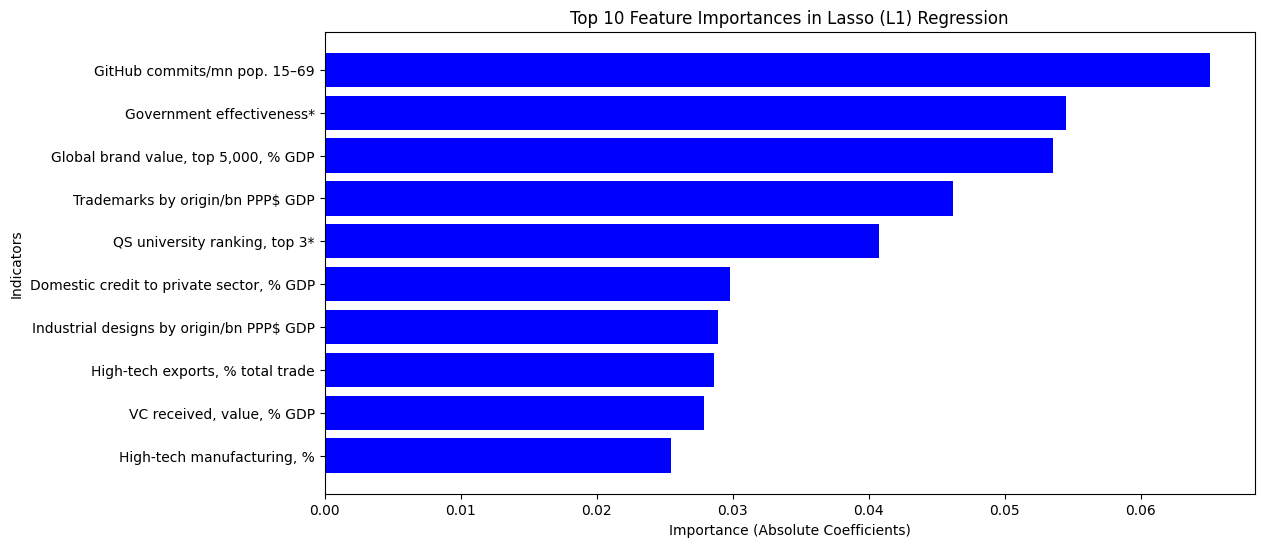

In [34]:
plt.figure(figsize=(12, 6))
plt.barh(lasso_importance_df["Indicators"][:10], lasso_importance_df["Importance"][:10], color='blue')
plt.xlabel("Importance (Absolute Coefficients)")
plt.ylabel("Indicators")
plt.title("Top 10 Feature Importances in Lasso (L1) Regression")
plt.gca().invert_yaxis()  # Invert to show highest importance at top
plt.show()

### Retrieve the Rank for Canada

In [35]:
# Ensure most_important_feature is in a list format
top_10_features = lasso_importance_df["Indicators"][:10].tolist()

# Filter df to get the row where NAME matches the most important features
feature_ranking_df = df[df["NAME"].isin(top_10_features)][["ECONOMY_NAME", "NAME", "SCORE", "RANK"]]

# Get Canada's rank
canada_rank = feature_ranking_df[feature_ranking_df["ECONOMY_NAME"] == "Canada"].copy()  # Explicit copy to avoid warning
canada_rank["NAME"] = pd.Categorical(canada_rank["NAME"], categories=top_10_features, ordered=True)
canada_rank = canada_rank.sort_values(by="NAME")

# Display results
pd.set_option('display.width', 400)
print(canada_rank)

     ECONOMY_NAME                                      NAME      SCORE  RANK
2832       Canada              GitHub commits/mn pop. 15–69  66.609483  11.0
2730       Canada                 Government effectiveness*  84.910537  11.0
2823       Canada      Global brand value, top 5,000, % GDP  50.412682  13.0
2822       Canada          Trademarks by origin/bn PPP$ GDP  17.124073  77.0
2752       Canada             QS university ranking, top 3*  84.851552   4.0
2770       Canada  Domestic credit to private sector, % GDP        NaN   NaN
2824       Canada  Industrial designs by origin/bn PPP$ GDP   2.960109  89.0
2816       Canada          High-tech exports, % total trade  20.542586  37.0
2776       Canada                 VC received, value, % GDP  66.817231  10.0
2812       Canada                High-tech manufacturing, %  38.010491  36.0


## Random Forest

### Train the Model

In [36]:
# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [10, 20, None],  # Depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples per split
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the best Random Forest model
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate the final model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Root Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
rf_model_performance = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Value": [mae_rf, mse_rf, rmse_rf, r2_rf]
})

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
rf_model_performance

,Metric,Value
0,Mean Absolute Error (MAE),4.151914
1,Mean Squared Error (MSE),27.628321
2,Root Mean Squared Error (RMSE),5.256265
3,R-squared (R²),0.889329


### Feature Importance

In [38]:
feature_names = X.columns
feature_importance_rf = best_rf.feature_importances_  # Extract feature importances

# Create a DataFrame for visualization
rf_importance_df = pd.DataFrame({"Indicators": feature_names, "Importance": feature_importance_rf})

# Sort by importance (descending order)
rf_importance_df = rf_importance_df.sort_values(by="Importance", ascending=False)

In [39]:
rf_importance_df

,Indicators,Importance
17,"GERD performed by business, % GDP",0.428848
50,Patent families/bn PPP$ GDP,0.077552
21,Government effectiveness*,0.046727
26,"Gross expenditure on R&D, % GDP",0.043351
42,Logistics performance*,0.040032
...,...,...
55,"Pupil–teacher ratio, secondary",0.000288
6,"Domestic market scale, bn PPP$",0.000274
69,"Unicorn valuation, % GDP",0.000202
0,"Applied tariff rate, weighted avg., %",0.000200


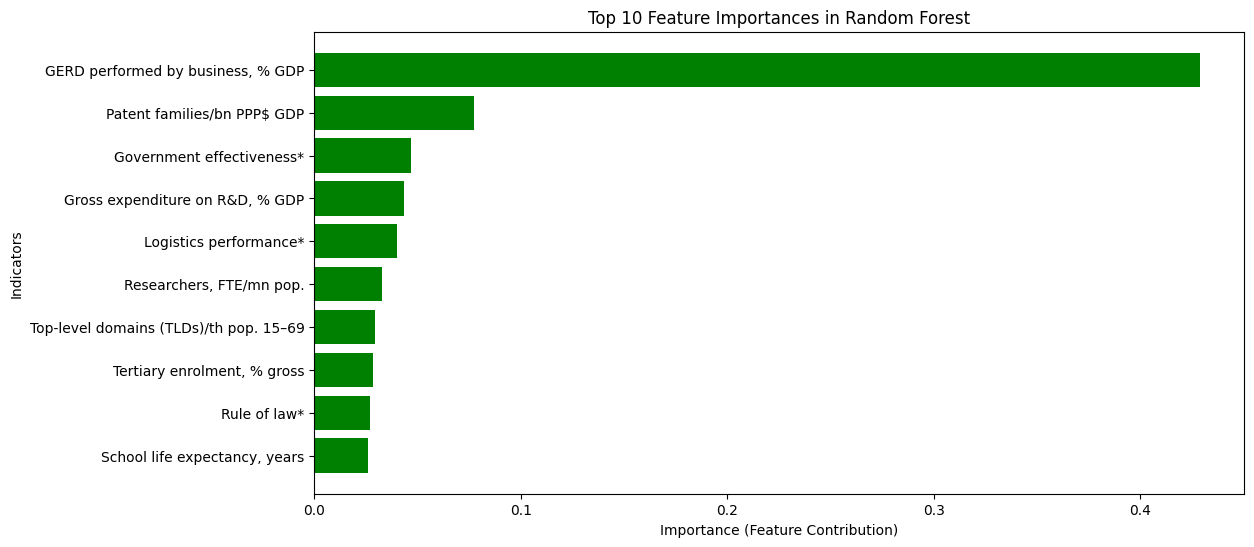

In [40]:
plt.figure(figsize=(12, 6))
plt.barh(rf_importance_df["Indicators"][:10], rf_importance_df["Importance"][:10], color='green')
plt.xlabel("Importance (Feature Contribution)")
plt.ylabel("Indicators")
plt.title("Top 10 Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # Invert to show highest importance at top
plt.show()

### Retrieve the Rank for Canada

In [41]:
# Ensure most_important_feature is in a list format
top_10_features = rf_importance_df["Indicators"][:10].tolist()

# Filter df to get the row where NAME matches the most important features
feature_ranking_df = df[df["NAME"].isin(top_10_features)][["ECONOMY_NAME", "NAME", "SCORE", "RANK"]]

# Get Canada's rank
canada_rank = feature_ranking_df[feature_ranking_df["ECONOMY_NAME"] == "Canada"].copy()  # Explicit copy to avoid warning
canada_rank["NAME"] = pd.Categorical(canada_rank["NAME"], categories=top_10_features, ordered=True)
canada_rank = canada_rank.sort_values(by="NAME")

# Display results
pd.set_option('display.width', 400)
print(canada_rank)

     ECONOMY_NAME                                    NAME      SCORE  RANK
2785       Canada       GERD performed by business, % GDP  24.241412  21.0
2793       Canada             Patent families/bn PPP$ GDP  27.314860  20.0
2730       Canada               Government effectiveness*  84.910537  11.0
2750       Canada         Gross expenditure on R&D, % GDP  28.315171  21.0
2761       Canada                  Logistics performance*  86.363636   7.0
2749       Canada                Researchers, FTE/mn pop.  54.559640  16.0
2831       Canada  Top-level domains (TLDs)/th pop. 15–69  51.724314  11.0
2745       Canada             Tertiary enrolment, % gross  50.387452  27.0
2733       Canada                            Rule of law*  88.753639  12.0
2741       Canada           School life expectancy, years  66.362904  38.0


## XGBoost

### Train the Model

In [42]:
# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of boosting rounds (trees)
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "max_depth": [3, 5, 7],  # Maximum depth of trees
    "subsample": [0.8, 1.0],  # Fraction of data used per boosting round
    "colsample_bytree": [0.8, 1.0]  # Fraction of features used per tree
}

# Initialize XGBoost model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the best XGBoost model
best_xgb = XGBRegressor(**best_params, objective="reg:squarederror", random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the final model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)  # Root Mean Squared Error
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display results
xgb_model_performance = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Value": [mae_xgb, mse_xgb, rmse_xgb, r2_xgb]
})

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [43]:
xgb_model_performance

,Metric,Value
0,Mean Absolute Error (MAE),3.217848
1,Mean Squared Error (MSE),15.402067
2,Root Mean Squared Error (RMSE),3.924547
3,R-squared (R²),0.938304


### Feature Importance

In [44]:
# Extract feature importance from the best XGBoost model
feature_names = X.columns
feature_importance_xgb = best_xgb.feature_importances_  # Extract feature importances

# Create a DataFrame for visualization
xgb_importance_df = pd.DataFrame({"Indicators": feature_names, "Importance": feature_importance_xgb})

# Sort by importance (descending order)
xgb_importance_df = xgb_importance_df.sort_values(by="Importance", ascending=False)

In [45]:
xgb_importance_df

,Indicators,Importance
17,"GERD performed by business, % GDP",0.251262
42,Logistics performance*,0.171098
61,"School life expectancy, years",0.087932
50,Patent families/bn PPP$ GDP,0.087540
60,Rule of law*,0.064050
...,...,...
66,"Tertiary inbound mobility, %",0.000025
43,"Low-carbon energy use, %",0.000024
34,ISO 14001 environment/bn PPP$ GDP,0.000017
6,"Domestic market scale, bn PPP$",0.000004


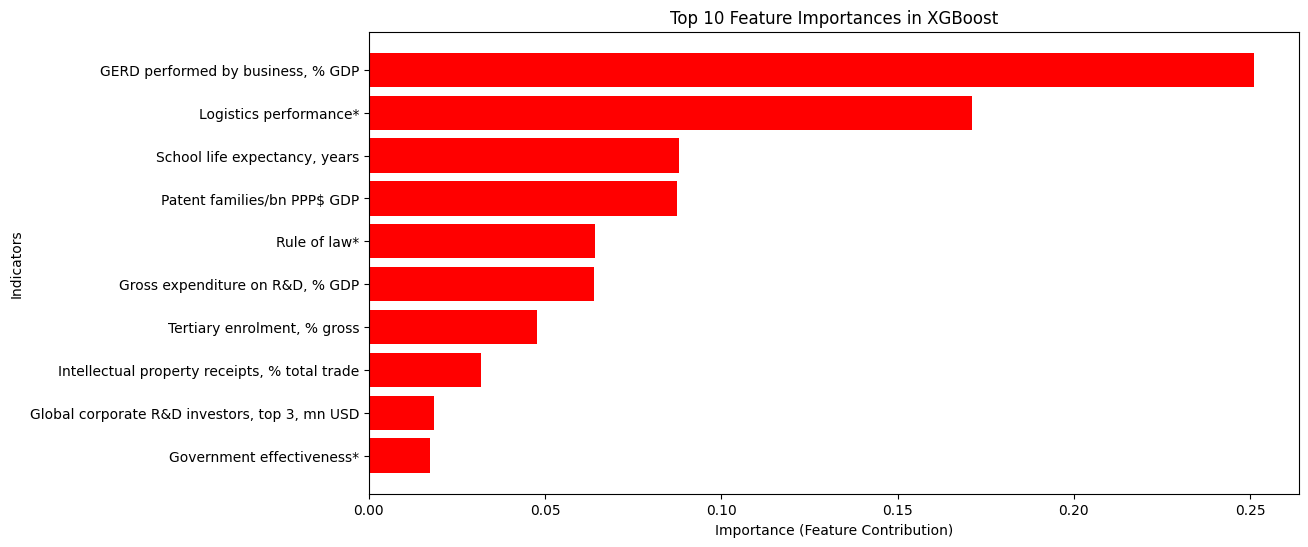

In [46]:

plt.figure(figsize=(12, 6))
plt.barh(xgb_importance_df["Indicators"][:10], xgb_importance_df["Importance"][:10], color='red')
plt.xlabel("Importance (Feature Contribution)")
plt.ylabel("Indicators")
plt.title("Top 10 Feature Importances in XGBoost")
plt.gca().invert_yaxis()  # Invert to show highest importance at top
plt.show()

### Retrieve the Rank for Canada

In [47]:
# Ensure most_important_feature is in a list format
top_10_features = xgb_importance_df["Indicators"][:10].tolist()

# Filter df to get the row where NAME matches the most important features
feature_ranking_df = df[df["NAME"].isin(top_10_features)][["ECONOMY_NAME", "NAME", "SCORE", "RANK"]]

# Get Canada's rank
canada_rank = feature_ranking_df[feature_ranking_df["ECONOMY_NAME"] == "Canada"].copy()  # Explicit copy to avoid warning
canada_rank["NAME"] = pd.Categorical(canada_rank["NAME"], categories=top_10_features, ordered=True)
canada_rank = canada_rank.sort_values(by="NAME")

# Display results
pd.set_option('display.width', 400)
print(canada_rank)

     ECONOMY_NAME                                           NAME      SCORE  RANK
2785       Canada              GERD performed by business, % GDP  24.241412  21.0
2761       Canada                         Logistics performance*  86.363636   7.0
2741       Canada                  School life expectancy, years  66.362904  38.0
2793       Canada                    Patent families/bn PPP$ GDP  27.314860  20.0
2733       Canada                                   Rule of law*  88.753639  12.0
2750       Canada                Gross expenditure on R&D, % GDP  28.315171  21.0
2745       Canada                    Tertiary enrolment, % gross  50.387452  27.0
2814       Canada  Intellectual property receipts, % total trade  39.161818  17.0
2751       Canada  Global corporate R&D investors, top 3, mn USD  66.759051  17.0
2730       Canada                      Government effectiveness*  84.910537  11.0


## Comparison

In [48]:
# Ensure each model performance DataFrame has a "Model" column for identification
model_performance_LR["Model"] = "Linear Regression"
model_performance_LASSO["Model"] = "Lasso Regression"
rf_model_performance["Model"] = "Random Forest"
xgb_model_performance["Model"] = "XGBoost"

# Combine all model performances into a single DataFrame
model_comparison = pd.concat(
    [model_performance_LR, model_performance_LASSO, rf_model_performance, xgb_model_performance],
    axis=0
)

# Pivot the DataFrame to have models as row names and metrics as columns
model_comparison = model_comparison.pivot(index="Model", columns="Metric", values="Value")

In [49]:
model_comparison

Metric,Mean Absolute Error (MAE),Mean Squared Error (MSE),R-squared (R²),Root Mean Squared Error (RMSE)
Model,,,,
Lasso Regression,1.319576,2.860244,0.988543,1.691226
Linear Regression,2.192305,8.479483,0.966034,2.911955
Random Forest,4.151914,27.628321,0.889329,5.256265
XGBoost,3.217848,15.402067,0.938304,3.924547


As Lasso regression has the highest R square and lowest RMSE, we will choose Lasso regression as our final model. The best alpha is 0.7742636826811278.

## Test set

In [50]:
# Run the test set using lasso regression
# Make predictions using the Lasso model
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate the Lasso model performance
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso)

# Display Lasso model performance on the test set
model_performance_lasso_test = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Value": [mae_lasso_test, mse_lasso_test, rmse_lasso_test, r2_lasso_test]
})

model_performance_lasso_test

,Metric,Value
0,Mean Absolute Error (MAE),1.319576
1,Mean Squared Error (MSE),2.860244
2,Root Mean Squared Error (RMSE),1.691226
3,R-squared (R²),0.988543
